In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
questions = 'https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Questions.csv'
answers = 'https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Answers.csv'
tags = 'https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Tags.csv'
users = 'https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Users.csv'

In [ ]:
# loading all dataframes
questions_df = pd.read_csv(questions,  encoding='ISO-8859-1')
answers_df = pd.read_csv(answers, encoding = 'ISO-8859-1')
tags_df = pd.read_csv(tags, encoding = 'ISO-8859-1')
users_df = pd.read_csv(users, encoding = 'ISO-8859-1')

# Data exploration
lets first start with exploring each of the dataset and see what major deficiencies can be cleaned.

## Questions.

In [ ]:
questions_df.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


In [ ]:
# Percentage of missing values in each 
(questions_df.isnull().sum()/questions_df.shape[0])*100

Id               0.000000
OwnerUserId      1.143317
CreationDate     0.000000
ClosedDate      95.573620
Score            0.000000
Title            0.000000
Body             0.000000
dtype: float64

* `OwnerUserId` has only 1% of its data missing. combine this with `Users_df` to see if the usernames
* `OwnerUserId` should be in integer type.
* `ClosedDate` is missing 95% of its data. we have 2 options. Either drop it or convert it into a binary column. "1" if its a closed question "0" if it isnt.


## Answers

In [ ]:
answers_df.head()

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,92,61.0,2008-08-01T14:45:37Z,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,124,26.0,2008-08-01T16:09:47Z,80,12,<p>I wound up using this. It is a kind of a ha...
2,199,50.0,2008-08-01T19:36:46Z,180,1,<p>I've read somewhere the human eye can't dis...
3,269,91.0,2008-08-01T23:49:57Z,260,4,"<p>Yes, I thought about that, but I soon figur..."
4,307,49.0,2008-08-02T01:49:46Z,260,28,"<p><a href=""http://www.codeproject.com/Article..."


* `OwnerUserId` should be of integer type.
* `CreationDate` should be of datetime type.

In [ ]:
# Percentage of missing values
(answers_df.isnull().sum()/answers_df.shape[0])*100

Id              0.000000
OwnerUserId     0.655244
CreationDate    0.000000
ParentId        0.000000
Score           0.000000
Body            0.000000
dtype: float64

* `OwnerUserId` is only missing 0.65% of its data. Drop them during the cleaning phase.
* `OwnerUserId` should be of integer type.
* `CreationDate` should be of datetime type.

## Tags

In [ ]:
tags_df.head()

,Id,Tag
0,80,flex
1,80,actionscript-3
2,80,air
3,90,svn
4,90,tortoisesvn


In [ ]:
# Percentage of missing vaues
(tags_df.isnull().sum()/tags_df.shape[0])*100

Id     0.000000
Tag    0.029672
dtype: float64

* We are free to drop the null values

## Users

In [ ]:
users_df.head()

,Unnamed: 0,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
0,0,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
1,1,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
2,2,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
3,3,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
4,4,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547


In [ ]:
# percentage of missing values
(users_df.isnull().sum()/users_df.shape[0])*100

Unnamed: 0          0.000000
id                  0.000000
display_name        0.006833
creation_date       0.000000
last_access_date    0.000000
reputation          0.000000
up_votes            0.000000
down_votes          0.000000
views               0.000000
dtype: float64

* There are clearly many duplicates in this dataset. Remove them.
* `Unnamed: 0` can be dropped.
* We will see if there is a way to get the missing names of the users by merging `users_df` with other dataframes.

# Data Cleaning and Manipulation
Lets spend some time cleaning the dataframes one-by-one.

## Questions

Drop duplicate entries.

In [ ]:
# There are no duplicate entries
questions_df[questions_df.duplicated()]

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body


`CreationDate` correct the time format

In [ ]:
questions_df['CreationDate'] = pd.to_datetime(questions_df['CreationDate'])

check to see if missing `OwnerUserId` can br found in any other dataframe.
  * This is not possible with the data available. `ParentId` in `answers_df` refers to `Id` in `questions_df` not `OwnerUserId`.
  * Its best we drop the `null` entries.

In [ ]:
questions_df.isnull().sum()

Id                    0
OwnerUserId       14454
CreationDate          0
ClosedDate      1208257
Score                 0
Title                 0
Body                  0
dtype: int64

In [ ]:
questions_df = questions_df[~questions_df['OwnerUserId'].isnull()]

In [ ]:
questions_df.shape

(1249762, 7)

Change dtype of `OwnerUserId` to `int`

In [ ]:
questions_df['OwnerUserId'] = questions_df['OwnerUserId'].astype('int64')

* `ClosedDate` is missing 95% of its data. Instead of dropping it we can convert it into a `boolean` column. 1 if question in closed 0 if its isnt.
* Drop `ClosedDate` .


In [ ]:
#closed = lambda x: 0 if x is np.nan else 1
def closedDateToBool(x):
  # x is the ClosedDate
  # return 1 if the question is Closed
  # else 0
  if pd.isnull(x):
    return 0
  else:
    return 1

questions_df['closed'] = questions_df['ClosedDate'].apply(closedDateToBool)

In [ ]:
questions_df.drop('ClosedDate', axis = 1, inplace = True)

In [ ]:
questions_df.shape

(1249762, 7)

## Answers

Drop duplicate entries

In [ ]:
answers_df[answers_df.duplicated()]

,Id,OwnerUserId,CreationDate,ParentId,Score,Body


There are no duplicate rows to delete in `answers_df`

* Correcting `CreationDate` dtype

In [ ]:
answers_df['CreationDate'] = pd.to_datetime(answers_df['CreationDate'])

* Drop `missing` entries from `OwnerUserId`

In [ ]:
answers_df = answers_df[~answers_df['OwnerUserId'].isnull()]

* Change `OwnerUserId` dtype from `float` to `int`

In [ ]:
answers_df['OwnerUserId'] = answers_df['OwnerUserId'].astype('int64')

In [ ]:
answers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2001316 entries, 0 to 2014515
Data columns (total 6 columns):
 #   Column        Dtype              
---  ------        -----              
 0   Id            int64              
 1   OwnerUserId   int64              
 2   CreationDate  datetime64[ns, UTC]
 3   ParentId      int64              
 4   Score         int64              
 5   Body          object             
dtypes: datetime64[ns, UTC](1), int64(4), object(1)
memory usage: 106.9+ MB


In [ ]:
answers_df.shape

(2001316, 6)

## Tags

Drop Duplicates Entries

In [ ]:
# check for duplicate entries
tags_df[tags_df.duplicated()]

,Id,Tag
1785133,21001320,NaN


In [ ]:
tags_df.drop_duplicates(inplace = True)

In [ ]:
(tags_df.isnull().sum()/tags_df.shape[0])*100

Id     0.000000
Tag    0.029645
dtype: float64

Lets create a new column `tag_present` to show if a tag was added to a question.

In [ ]:
def tagPresent(x):
  # x = Tag of a question
  if pd.isnull(x):
    return 0
  else:
    return 1

In [ ]:
tags_df['tag_present'] = tags_df['Tag'].apply(tagPresent)

Instead of dropping entries missing tags lets fill them with ""

In [ ]:
tags_df['Tag'] = tags_df['Tag'].fillna("")

Lets change all the tags to lower case

In [ ]:
tags_df['Tag'] = tags_df['Tag'].str.lower()

## Users

drop `Unnamed: 0`

In [ ]:
users_df.drop('Unnamed: 0', axis = 1, inplace = True)

Drop duplicate entries.

In [ ]:
users_df.drop_duplicates(inplace = True)

change `Creation_date` and `last_access_date` to datetime type

In [ ]:
users_df['creation_date'] = pd.to_datetime(users_df['creation_date'])
users_df['last_access_date'] = pd.to_datetime(users_df['last_access_date'])

Lets keep the missing `display_name` and replace them with ""

In [ ]:
users_df[users_df['display_name'].isnull()].shape

(24, 8)

In [ ]:
users_df['display_name'] = users_df['display_name'].fillna("")

In [ ]:
users_df.isnull().sum()

id                  0
display_name        0
creation_date       0
last_access_date    0
reputation          0
up_votes            0
down_votes          0
views               0
dtype: int64

# Standardize the datasets
We need to standardize our datasets, so that they are of the same scale.

## Questions

In [ ]:
colsToStandardize = ['Score']

In [ ]:
def standardize_cols(col, df):
  # create a new column for standardized value
  for i in col:
    df['{}_std'.format(i)] = (df[i]-df[i].mean())/df[i].std()

  return df

In [ ]:
questions_df = standardize_cols(colsToStandardize, questions_df)

## Answers

In [ ]:
colsToStandardize = ['Score']
answers_df = standardize_cols(colsToStandardize,answers_df)

## Users

In [ ]:
colsToStandardize = ['reputation', 'up_votes',
                     'down_votes', 'views']
users_df = standardize_cols(colsToStandardize, users_df)

# Feature Engineering
We will first try to develop more features to help extract more information from this data. 

## Time to get answer
We will try to get an answer to the question
>When a user provides a data science tag ('python', 'r', 'matlab', 'sas', 'excel', 'sql') to their question, then Stack Overflow should come up with the expected approximate time to get it answered.

The formula to get this time could be so
$$\text{Time to answer} = \text{Question Creation date} - \text{min(Answer Creation Date)}$$


In [ ]:
questions_df.head(1)

,Id,OwnerUserId,CreationDate,Score,Title,Body,closed,Score_std
0,80,26,2008-08-01 13:57:07+00:00,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,0,1.774833


In [ ]:
minAnswerTime = answers_df.groupby('ParentId')['CreationDate'].min()

In [ ]:
def answerCreationDates(QuestionId):
  # Return the earliest date of the answers to a question.
  try:
    # return the date of the first answer.
    return minAnswerTime[QuestionId]
  except:
    # if there is no date of the answer then return the max date as default.
    return pd.Timestamp('20161019', tz = 'UTC')

In [ ]:
questions_df['fastestAnsDate'] = questions_df['Id'].apply(answerCreationDates)

In [ ]:
questions_df.head()

,Id,OwnerUserId,CreationDate,Score,Title,Body,closed,Score_std,fastestAnsDate
0,80,26,2008-08-01 13:57:07+00:00,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,0,1.774833,2008-08-01 16:09:47+00:00
1,90,58,2008-08-01 14:41:24+00:00,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,1,10.418332,2008-08-01 14:45:37+00:00
2,120,83,2008-08-01 15:50:08+00:00,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,0,1.408583,2008-09-23 22:41:11+00:00
3,180,2089740,2008-08-01 18:42:19+00:00,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,0,3.752583,2008-08-01 19:36:46+00:00
4,260,91,2008-08-01 23:22:08+00:00,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,0,3.459583,2008-08-01 23:49:57+00:00


`TimeToAnswer` is the time to get the first answer to each question

In [ ]:
questions_df['TimeToAnswer'] =  questions_df['fastestAnsDate'] - questions_df['CreationDate']

Convert `TimeToAnswer` it into hours

In [ ]:
# Convert the TimeToAnswer to hours
questions_df['TimeToAnswer'] = questions_df['TimeToAnswer'].dt.components['days']*24 + \
                                questions_df['TimeToAnswer'].dt.components['hours'] + \
                                questions_df['TimeToAnswer'].dt.components['minutes']/60 + \
                                questions_df['TimeToAnswer'].dt.components['seconds']/3600

Standardize the `TimeToAnswer`

In [ ]:
colsToStandardize = ['TimeToAnswer']
questions_df = standardize_cols(colsToStandardize, questions_df)

## Presence of DataScience tags

we will be focussing on DataScience tags exclusively. So lets create a column in `tags` which shows if a question has DataScience tags
$['python', 'r', 'matlab', 'sas', 'excel', 'sql']$

In [ ]:
tags_df.head(2)

,Id,Tag,tag_present
0,80,flex,1
1,80,actionscript-3,1


Create a column to show  if there is a DataScience tag in `tags_df` . 

In [ ]:
tags_df['DataScience'] = tags_df['Tag'].apply(lambda x: 1 if x in ['python','r','matlab','sas','excel','sql'] else 0)

In [ ]:
dataScienceTags = tags_df.groupby('Id')['DataScience'].max()
questions_df['ds_tags'] = questions_df['Id'].apply(lambda x: dataScienceTags[x])

Lets create a separate column for each data science tag to show which onces a question has.`['python','r','matlab','sas','excel','sql']`.
First lets create them in `tags_df`

In [ ]:
for dstag in ['python','r','matlab','sas','excel','sql']:
  tags_df[dstag] = tags_df['Tag'].apply(lambda x: 1 if x == dstag else 0)

In [ ]:
for dstag in ['python','r','matlab','sas','excel','sql']:
  dsTagGroup = tags_df.groupby('Id')[dstag].max()
  questions_df[dstag] = questions_df['Id'].apply(lambda x: dsTagGroup[x])

In [ ]:
questions_df.head()

,Id,OwnerUserId,CreationDate,Score,Title,Body,closed,Score_std,fastestAnsDate,TimeToAnswer,TimeToAnswer_std,ds_tags,python,r,matlab,sas,excel,sql
0,80,26,2008-08-01 13:57:07+00:00,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,0,1.774833,2008-08-01 16:09:47+00:00,2.211111,-0.312692,0,0,0,0,0,0,0
1,90,58,2008-08-01 14:41:24+00:00,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,1,10.418332,2008-08-01 14:45:37+00:00,0.070278,-0.313000,0,0,0,0,0,0,0
2,120,83,2008-08-01 15:50:08+00:00,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,0,1.408583,2008-09-23 22:41:11+00:00,1278.850833,-0.128455,1,0,0,0,0,0,1
3,180,2089740,2008-08-01 18:42:19+00:00,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,0,3.752583,2008-08-01 19:36:46+00:00,0.907500,-0.312880,0,0,0,0,0,0,0
4,260,91,2008-08-01 23:22:08+00:00,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,0,3.459583,2008-08-01 23:49:57+00:00,0.463611,-0.312944,0,0,0,0,0,0,0


## Title and Body Length
- Its is intuitive that a question with a succinct length and descriptive body would have a high likelyhood of getting answer.
- Lets create a column for the length of the question title and body.


In [ ]:
questions_df['title_length'] = questions_df['Title'].str.len()

In [ ]:
questions_df['body_length'] = questions_df['Body'].str.len()

In [ ]:
questions_df.head(2)

,Id,OwnerUserId,CreationDate,Score,Title,Body,closed,Score_std,fastestAnsDate,TimeToAnswer,TimeToAnswer_std,ds_tags,python,r,matlab,sas,excel,sql,title_length,body_length
0,80,26,2008-08-01 13:57:07+00:00,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,0,1.774833,2008-08-01 16:09:47+00:00,2.211111,-0.312692,0,0,0,0,0,0,0,58,1941
1,90,58,2008-08-01 14:41:24+00:00,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,1,10.418332,2008-08-01 14:45:37+00:00,0.070278,-0.313000,0,0,0,0,0,0,0,53,249


Lets Standardize the lengths

In [ ]:
colsToStandardize = ['title_length', 'body_length']
questions_df = standardize_cols(colsToStandardize, questions_df)

## Code present in question.
The likelihood of your question receiving a good answer will be improved if a code is included in your description 

In [ ]:
questions_df['hasCode'] = questions_df['Body'].str.contains('<code>').apply(lambda x: 1 if x else 0)

In [ ]:
questions_df.head(2)

,Id,OwnerUserId,CreationDate,Score,Title,Body,closed,Score_std,fastestAnsDate,TimeToAnswer,TimeToAnswer_std,ds_tags,python,r,matlab,sas,excel,sql,title_length,body_length,title_length_std,body_length_std,hasCode
0,80,26,2008-08-01 13:57:07+00:00,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,0,1.774833,2008-08-01 16:09:47+00:00,2.211111,-0.312692,0,0,0,0,0,0,0,58,1941,0.314937,0.282278,1
1,90,58,2008-08-01 14:41:24+00:00,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,1,10.418332,2008-08-01 14:45:37+00:00,0.070278,-0.313000,0,0,0,0,0,0,0,53,249,0.062504,-0.621867,0


## Number of Tags.
The reach of your answer is improvied if you include more relevant tags.

In [ ]:
numTags = tags_df.groupby('Id')['Tag'].count()
questions_df['numTags'] = questions_df['Id'].apply(lambda x: numTags[x])

In [ ]:
questions_df.head(2)

,Id,OwnerUserId,CreationDate,Score,Title,Body,closed,Score_std,fastestAnsDate,TimeToAnswer,TimeToAnswer_std,ds_tags,python,r,matlab,sas,excel,sql,title_length,body_length,title_length_std,body_length_std,hasCode,numTags
0,80,26,2008-08-01 13:57:07+00:00,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,0,1.774833,2008-08-01 16:09:47+00:00,2.211111,-0.312692,0,0,0,0,0,0,0,58,1941,0.314937,0.282278,1,3
1,90,58,2008-08-01 14:41:24+00:00,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,1,10.418332,2008-08-01 14:45:37+00:00,0.070278,-0.313000,0,0,0,0,0,0,0,53,249,0.062504,-0.621867,0,4


Lets create a `tag_present` column in `questions_df`

In [ ]:
tags_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3750993 entries, 0 to 3750993
Data columns (total 10 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   Id           int64 
 1   Tag          object
 2   tag_present  int64 
 3   DataScience  int64 
 4   python       int64 
 5   r            int64 
 6   matlab       int64 
 7   sas          int64 
 8   excel        int64 
 9   sql          int64 
dtypes: int64(9), object(1)
memory usage: 314.8+ MB


In [ ]:
tags_df.groupby('Id').max()

,Tag,tag_present,DataScience,python,r,matlab,sas,excel,sql
Id,,,,,,,,,
80,flex,1,0,0,0,0,0,0,0
90,tortoisesvn,1,0,0,0,0,0,0,0
120,sql,1,1,0,0,0,0,0,1
180,language-agnostic,1,0,0,0,0,0,0,0
260,scripting,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
40143210,php,1,0,0,0,0,0,0,0
40143300,google-bigquery,1,0,0,0,0,0,0,0
40143340,android-studio,1,0,0,0,0,0,0,0


In [ ]:
tags_present = tags_df.groupby('Id')['tag_present'].max()
questions_df['tags_present'] = questions_df['Id'].apply(lambda x: tags_present[x])

In [ ]:
questions_df.head(2)

,Id,OwnerUserId,CreationDate,Score,Title,Body,closed,Score_std,fastestAnsDate,TimeToAnswer,TimeToAnswer_std,ds_tags,python,r,matlab,sas,excel,sql,title_length,body_length,title_length_std,body_length_std,hasCode,numTags,tags_present
0,80,26,2008-08-01 13:57:07+00:00,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,0,1.774833,2008-08-01 16:09:47+00:00,2.211111,-0.312692,0,0,0,0,0,0,0,58,1941,0.314937,0.282278,1,3,1
1,90,58,2008-08-01 14:41:24+00:00,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,1,10.418332,2008-08-01 14:45:37+00:00,0.070278,-0.313000,0,0,0,0,0,0,0,53,249,0.062504,-0.621867,0,4,1


## Time based activity
Lets split the Date of creation od questions ans answers to 
- Date of month
- Month
- Hour
- Year
- Day of Week

In [ ]:
def getDateComponents(df, col):
  # date of month
  df['{}_date'.format(col)] = df[col].dt.day
  # month
  df['{}_month'.format(col)] = df[col].dt.month
  # hour
  df['{}_hr'.format(col)] = df[col].dt.hour
  # day of week
  df['{}_day'.format(col)] = df[col].dt.day_name()
  # year
  df['{}_year'.format(col)] = df[col].dt.year
  return df

In [ ]:
questions_df = getDateComponents(questions_df, 'CreationDate')

In [ ]:
answers_df = getDateComponents(answers_df, 'CreationDate')

## User Activity
Lets add a column to show if the User was active last year(2019). This is important because sending a notification to an inactive user would be useless.

In [ ]:
users_df['active_last_year'] = users_df['last_access_date'].apply(lambda x: 1 if x.year == 2019 else 0)

In [ ]:
users_df.head(2)

,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views,reputation_std,up_votes_std,down_votes_std,views_std,active_last_year
0,26,Shawn,2008-08-01 12:18:14.520000+00:00,2018-04-11 04:40:35.660000+00:00,11820,565,67,3547,0.895714,0.581188,0.073646,0.973647,0
27,1109,Theo,2008-08-12 12:16:58.610000+00:00,2019-08-31 11:39:52.280000+00:00,116072,457,136,6905,10.382702,0.412543,0.207472,1.962332,1


## Number of answers to a question
Now, lets add a column to show how many answers each question received. 

In [ ]:
answers_df.head(2)

,Id,OwnerUserId,CreationDate,ParentId,Score,Body,Score_std,CreationDate_date,CreationDate_month,CreationDate_hr,CreationDate_day,CreationDate_year
0,92,61,2008-08-01 14:45:37+00:00,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers...",0.660407,1,8,14,Friday,2008
1,124,26,2008-08-01 16:09:47+00:00,80,12,<p>I wound up using this. It is a kind of a ha...,0.597631,1,8,16,Friday,2008


In [ ]:
numAnswers = answers_df.groupby('ParentId')['Id'].count()
def num_of_answers(x):
  # This function return the number of answers received by each question
  try:
    return numAnswers[x]
  except:
    return 0
    
questions_df['num_of_answers'] = questions_df['Id'].apply(num_of_answers)

In [ ]:
questions_df.head(2)

,Id,OwnerUserId,CreationDate,Score,Title,Body,closed,Score_std,fastestAnsDate,TimeToAnswer,TimeToAnswer_std,ds_tags,python,r,matlab,sas,excel,sql,title_length,body_length,title_length_std,body_length_std,hasCode,numTags,tags_present,CreationDate_date,CreationDate_month,CreationDate_hr,CreationDate_day,CreationDate_year,num_of_answers
0,80,26,2008-08-01 13:57:07+00:00,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,0,1.774833,2008-08-01 16:09:47+00:00,2.211111,-0.312692,0,0,0,0,0,0,0,58,1941,0.314937,0.282278,1,3,1,1,8,13,Friday,2008,3
1,90,58,2008-08-01 14:41:24+00:00,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,1,10.418332,2008-08-01 14:45:37+00:00,0.070278,-0.313000,0,0,0,0,0,0,0,53,249,0.062504,-0.621867,0,4,1,1,8,14,Friday,2008,3


In [ ]:
questions_df['num_of_answers'].describe()

count    1.249762e+06
mean     1.576975e+00
std      1.475294e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      3.840000e+02
Name: num_of_answers, dtype: float64

Because the `num_of_answers`swings between such a large range, we will consider it as a continuous variable. Hence the need to Standardize it

In [ ]:
colsToStandardize = ['num_of_answers']
questions_df = standardize_cols(colsToStandardize, questions_df)

In [ ]:
questions_df.head(1)

,Id,OwnerUserId,CreationDate,Score,Title,Body,closed,Score_std,fastestAnsDate,TimeToAnswer,TimeToAnswer_std,ds_tags,python,r,matlab,sas,excel,sql,title_length,body_length,title_length_std,body_length_std,hasCode,numTags,tags_present,CreationDate_date,CreationDate_month,CreationDate_hr,CreationDate_day,CreationDate_year,num_of_answers,num_of_answers_std
0,80,26,2008-08-01 13:57:07+00:00,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,0,1.774833,2008-08-01 16:09:47+00:00,2.211111,-0.312692,0,0,0,0,0,0,0,58,1941,0.314937,0.282278,1,3,1,1,8,13,Friday,2008,3,0.964571


# Data Cleaning
We have added a lot of important columns. so lets remove the redundant columns. This will reduce the memory footprint as well.

## Questions

In [ ]:
questions_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249762 entries, 0 to 1264215
Data columns (total 32 columns):
 #   Column              Non-Null Count    Dtype              
---  ------              --------------    -----              
 0   Id                  1249762 non-null  int64              
 1   OwnerUserId         1249762 non-null  int64              
 2   CreationDate        1249762 non-null  datetime64[ns, UTC]
 3   Score               1249762 non-null  int64              
 4   Title               1249762 non-null  object             
 5   Body                1249762 non-null  object             
 6   closed              1249762 non-null  int64              
 7   Score_std           1249762 non-null  float64            
 8   fastestAnsDate      1249762 non-null  datetime64[ns, UTC]
 9   TimeToAnswer        1249762 non-null  float64            
 10  TimeToAnswer_std    1249762 non-null  float64            
 11  ds_tags             1249762 non-null  int64              
 12  

In [ ]:
cols_to_delete = ['CreationDate', 'Title', 'Body', 'fastestAnsDate']
questions_df.drop(cols_to_delete, axis = 1, inplace = True)

## Answer

In [ ]:
answers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2001316 entries, 0 to 2014515
Data columns (total 12 columns):
 #   Column              Dtype              
---  ------              -----              
 0   Id                  int64              
 1   OwnerUserId         int64              
 2   CreationDate        datetime64[ns, UTC]
 3   ParentId            int64              
 4   Score               int64              
 5   Body                object             
 6   Score_std           float64            
 7   CreationDate_date   int64              
 8   CreationDate_month  int64              
 9   CreationDate_hr     int64              
 10  CreationDate_day    object             
 11  CreationDate_year   int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(8), object(2)
memory usage: 198.5+ MB


In [ ]:
cols_to_delete = ['Body', 'CreationDate']
answers_df.drop(cols_to_delete, axis = 1, inplace = True)

## Users

In [ ]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465460 entries, 0 to 1990479
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   id                465460 non-null  int64              
 1   display_name      465460 non-null  object             
 2   creation_date     465460 non-null  datetime64[ns, UTC]
 3   last_access_date  465460 non-null  datetime64[ns, UTC]
 4   reputation        465460 non-null  int64              
 5   up_votes          465460 non-null  int64              
 6   down_votes        465460 non-null  int64              
 7   views             465460 non-null  int64              
 8   reputation_std    465460 non-null  float64            
 9   up_votes_std      465460 non-null  float64            
 10  down_votes_std    465460 non-null  float64            
 11  views_std         465460 non-null  float64            
 12  active_last_year  465460 non-null  int64   

In [ ]:
cols_to_delete = ['creation_date']
users_df.drop(cols_to_delete, axis = 1, inplace = True)

`reputation` already comprises of `up_votes` and `down_votes` so let us drop those as well

In [ ]:
cols_to_delete = ['up_votes', 'down_votes', 'up_votes_std', 'down_votes_std']
users_df.drop(cols_to_delete, axis = 1, inplace = True)

## Tags

In [ ]:
tags_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3750993 entries, 0 to 3750993
Data columns (total 10 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   Id           int64 
 1   Tag          object
 2   tag_present  int64 
 3   DataScience  int64 
 4   python       int64 
 5   r            int64 
 6   matlab       int64 
 7   sas          int64 
 8   excel        int64 
 9   sql          int64 
dtypes: int64(9), object(1)
memory usage: 314.8+ MB


We can remove these columns as well.

In [ ]:
cols_to_delete = ['tag_present', 'DataScience', 'python', 
                  'r', 'matlab', 'sas', 'excel', 'sql']
tags_df.drop(cols_to_delete, axis = 1, inplace = True)

# Univariate Analysis
Lets go over each column of each dataframe and perform `Univariate Analysis`

A colummn can be roughly categorized as either `numerical` or `categorical`.
We will then write a couple of functions for univariate analysis on noth numerical and categorical variables 

In [ ]:
def univariateNumerical(df, col, name = None):
  """
  df - dataframe
  col - numerical variable
  name - description of the column
  """
  # if name has not been 
  # provided use col instead 
  if name == None:
    name = col
  # numerical overview
  print("---------------------------------------")
  print("UNIVARIATE ANALYSIS for {}".format(col))
  print("Description of {}".format(col))
  print(df[col].describe())
  
  # boxplot
  plt.title('Boxplot for {} .'.format(col))
  sns.boxplot(x = col, data = df)
  plt.xlabel(col)
  plt.show()

  # distplot
  plt.title('Distplot for {} .'.format(col))
  sns.distplot(df[col])
  plt.xlabel(col)
  plt.show()


In [ ]:
def univariateCategorical(df, col, name = None, limit = 5):
  """
  df = dataframe
  col = column to plot
  name = description of the column
  limit = number of top classes of the column to plot 
  """
  if name == None:
    name = col
  # frequency of each category
  print("################################################")
  print("Frequency of each category of {} .".format(col))
  print(df[col].value_counts(normalize = True))

  # count plot
  print("Count plot for {} .".format(col))
  plt.title("Count plot for {} ".format(name))
  # display only top "limit" categories
  sns.countplot(df[col], 
                order = df[col].value_counts()[:limit].index)
  plt.xlabel(name)
  plt.show()


## Questions

### Numerical Variables

---------------------------------------
UNIVARIATE ANALYSIS for Score
Description of Score
count    1.249762e+06
mean     1.770194e+00
std      1.365188e+01
min     -7.300000e+01
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      5.190000e+03
Name: Score, dtype: float64


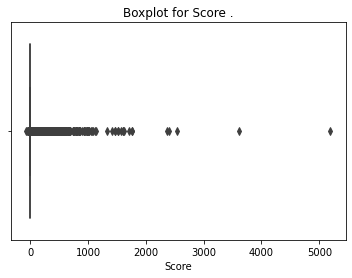

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


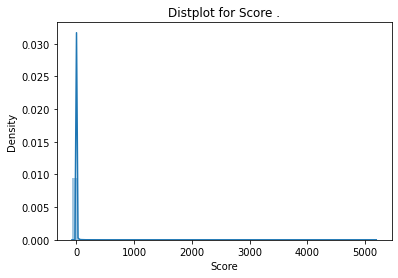

---------------------------------------
UNIVARIATE ANALYSIS for TimeToAnswer
Description of TimeToAnswer
count    1.249762e+06
mean     2.168964e+03
std      6.929364e+03
min     -3.189654e+04
25%      1.366667e-01
50%      6.658333e-01
75%      2.393528e+01
max      7.158323e+04
Name: TimeToAnswer, dtype: float64


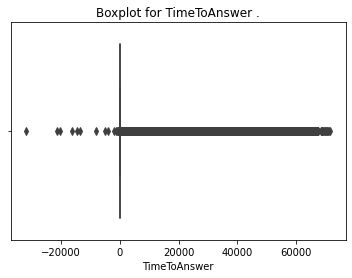

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


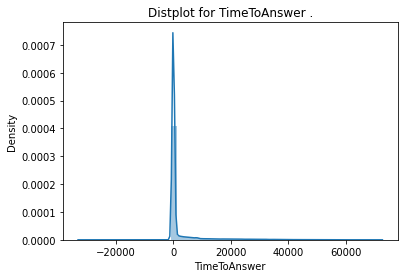

---------------------------------------
UNIVARIATE ANALYSIS for title_length
Description of title_length
count    1.249762e+06
mean     5.176196e+01
std      1.980730e+01
min      9.000000e+00
25%      3.700000e+01
50%      4.900000e+01
75%      6.300000e+01
max      1.890000e+02
Name: title_length, dtype: float64


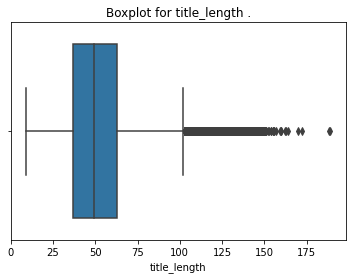

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


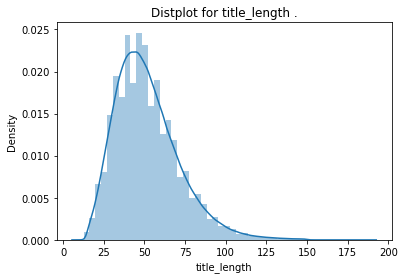

---------------------------------------
UNIVARIATE ANALYSIS for body_length
Description of body_length
count    1.249762e+06
mean     1.412751e+03
std      1.871382e+03
min      1.800000e+01
25%      5.160000e+02
50%      8.970000e+02
75%      1.603000e+03
max      4.648900e+04
Name: body_length, dtype: float64


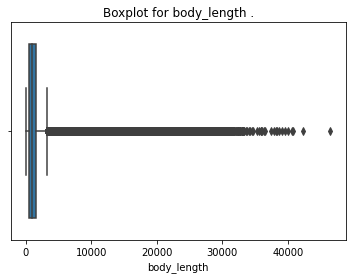

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


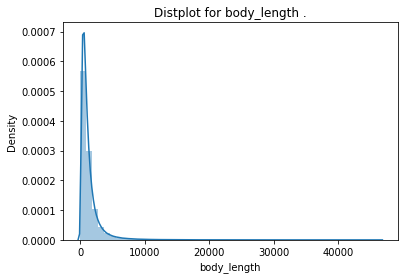

In [ ]:
# Numerical Univariate analysis of questions_df
# use non standardized columns
numerical_cols = {'Score' : 'Score of the question',
                  'TimeToAnswer' : 'Time Taken To Answer',
                  'title_length' : 'Length Of Question Title',
                  'body_length' : 'Length Of Question Description'}

for col, name in numerical_cols.items():
  univariateNumerical(questions_df, col, name)

#### **Analysis**

**Score**

A lot of the questions have a score very close to zero. Whereas there are only a select questions with a high score. The distribution is right skewed because this reason.

**TimeToAnswer**

75% of the questions receive an answer within 24 hours. We see negative numbers because there are many times when the community asks for clarification about the question and the Owner then has to edit the question.

The distribution here is also right skewed because some questions take a very long time to get an answer. sometimes more than year.

**title_length**

This looks a little more balanced but is still slightly right skewed. The average length of the title is 52 characters. There are only few questions with a long length, which is not recommended. If you must increase the length of the Body

**body_length**

The majority of the questions have a length less than 4000 characters. The average length of the description seems about 1400 characters. Most questions have a length ranging between 500 and 1500.




### Categorical Variables

In [ ]:
questions_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249762 entries, 0 to 1264215
Data columns (total 28 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Id                  1249762 non-null  int64  
 1   OwnerUserId         1249762 non-null  int64  
 2   Score               1249762 non-null  int64  
 3   closed              1249762 non-null  int64  
 4   Score_std           1249762 non-null  float64
 5   TimeToAnswer        1249762 non-null  float64
 6   TimeToAnswer_std    1249762 non-null  float64
 7   ds_tags             1249762 non-null  int64  
 8   python              1249762 non-null  int64  
 9   r                   1249762 non-null  int64  
 10  matlab              1249762 non-null  int64  
 11  sas                 1249762 non-null  int64  
 12  excel               1249762 non-null  int64  
 13  sql                 1249762 non-null  int64  
 14  title_length        1249762 non-null  int64  
 15  body_length    

################################################
Frequency of each category of closed .
0    0.9558
1    0.0442
Name: closed, dtype: float64
Count plot for closed .


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


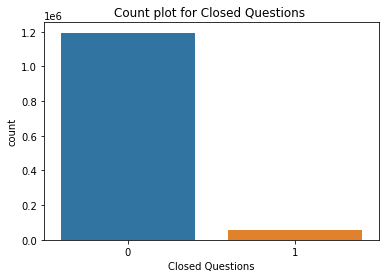

################################################
Frequency of each category of ds_tags .
0    0.895412
1    0.104588
Name: ds_tags, dtype: float64
Count plot for ds_tags .


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


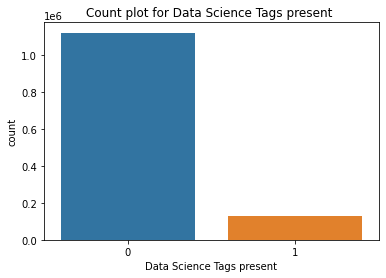

################################################
Frequency of each category of python .
0    0.948834
1    0.051166
Name: python, dtype: float64
Count plot for python .


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


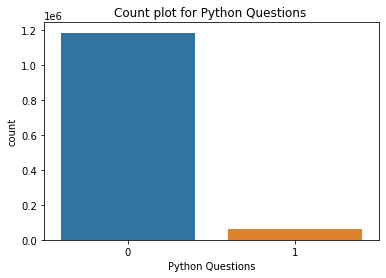

################################################
Frequency of each category of r .
0    0.98751
1    0.01249
Name: r, dtype: float64
Count plot for r .


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


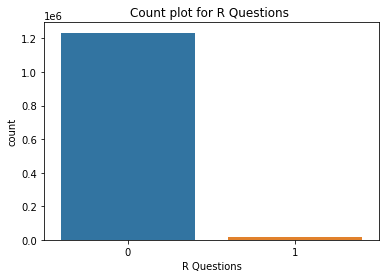

################################################
Frequency of each category of matlab .
0    0.994846
1    0.005154
Name: matlab, dtype: float64
Count plot for matlab .


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


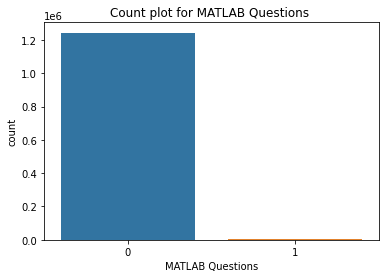

################################################
Frequency of each category of sas .
0    0.999448
1    0.000552
Name: sas, dtype: float64
Count plot for sas .


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


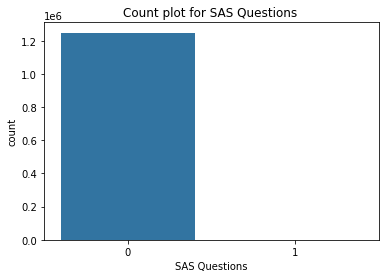

################################################
Frequency of each category of excel .
0    0.991768
1    0.008232
Name: excel, dtype: float64
Count plot for excel .


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


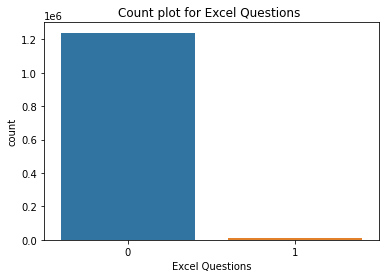

################################################
Frequency of each category of sql .
0    0.971749
1    0.028251
Name: sql, dtype: float64
Count plot for sql .


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


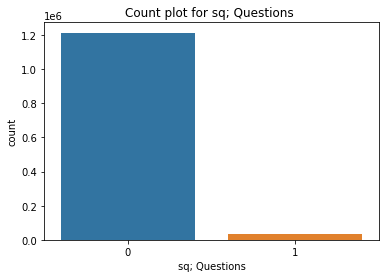

################################################
Frequency of each category of hasCode .
1    0.739737
0    0.260263
Name: hasCode, dtype: float64
Count plot for hasCode .


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


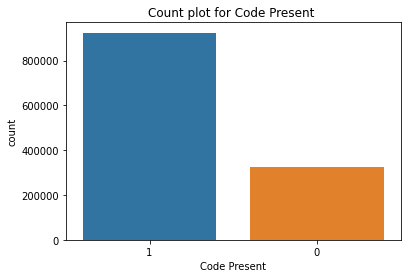

################################################
Frequency of each category of numTags .
3    0.290939
2    0.258184
4    0.201282
5    0.131213
1    0.118382
Name: numTags, dtype: float64
Count plot for numTags .


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


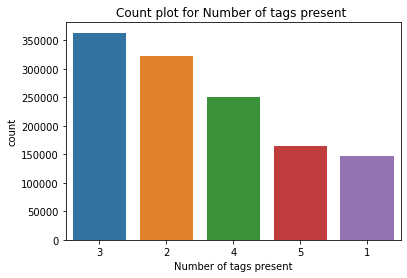

################################################
Frequency of each category of tags_present .
1    0.999998
0    0.000002
Name: tags_present, dtype: float64
Count plot for tags_present .


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


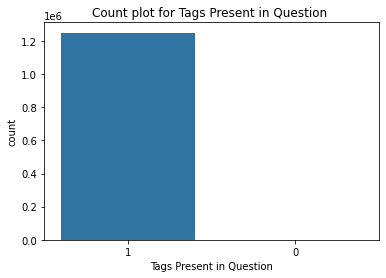

In [ ]:
cat_columns = {'closed': 'Closed Questions',
               'ds_tags': 'Data Science Tags present',
               'python': 'Python Questions',
               'r': 'R Questions',
               'matlab': 'MATLAB Questions',
               'sas': 'SAS Questions',
               'excel': 'Excel Questions',
               'sql': 'sq; Questions',
               'hasCode': 'Code Present',
               'numTags': 'Number of tags present',
               'tags_present': 'Tags Present in Question',
               }

for col, name in cat_columns.items():
  univariateCategorical(questions_df, col, name)


#### **Analysis**

**closed**

A question on StackOverflow is usually closed if it is not accepting answers, either because it was deemed as a duplicate of another question, or was too generic to lend to any fruitful answer or a multitude of reasons. 4.5% of the questions are closed.

Ths can be excluded from further analysis.

**ds_tags**

10% of the questions in StackOverflow are concerned with Data Science.

**python**

About 5% of the questions on StackOverflow are regarding Python. Of all the Data Science tags most questions were asked for python.

**hasCode**

It is considered good practice to include code in the question. But only 26% of the questions have some code included.

**numTags**

Most questions have 2-3 tags pinned to a question. This improves the spread of the question.

**tags_present**

All questions at least one Tag which is a good thing. This can be ignored in further analysis

### DateTime Variables

In [ ]:
questions_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249762 entries, 0 to 1264215
Data columns (total 28 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Id                  1249762 non-null  int64  
 1   OwnerUserId         1249762 non-null  int64  
 2   Score               1249762 non-null  int64  
 3   closed              1249762 non-null  int64  
 4   Score_std           1249762 non-null  float64
 5   TimeToAnswer        1249762 non-null  float64
 6   TimeToAnswer_std    1249762 non-null  float64
 7   ds_tags             1249762 non-null  int64  
 8   python              1249762 non-null  int64  
 9   r                   1249762 non-null  int64  
 10  matlab              1249762 non-null  int64  
 11  sas                 1249762 non-null  int64  
 12  excel               1249762 non-null  int64  
 13  sql                 1249762 non-null  int64  
 14  title_length        1249762 non-null  int64  
 15  body_length    

################################################
Frequency of each category of CreationDate_date .
19    0.034368
18    0.034204
11    0.034095
17    0.033860
12    0.033614
22    0.033536
9     0.033499
10    0.033493
8     0.033382
13    0.033262
4     0.033239
16    0.033157
20    0.033084
7     0.032995
21    0.032975
5     0.032973
14    0.032949
15    0.032887
23    0.032869
3     0.032693
6     0.032609
27    0.032326
24    0.032187
26    0.032139
28    0.032133
2     0.031783
25    0.031574
29    0.031060
1     0.030242
30    0.029538
31    0.017276
Name: CreationDate_date, dtype: float64
Count plot for CreationDate_date .


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


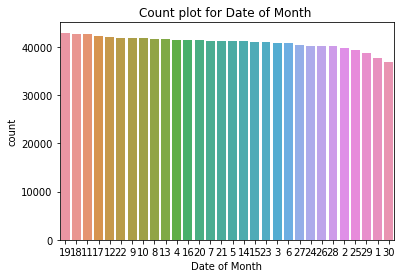

################################################
Frequency of each category of CreationDate_month .
3     0.089926
7     0.088629
4     0.087544
8     0.087173
10    0.086286
5     0.086099
9     0.085631
6     0.084126
2     0.080400
1     0.078749
11    0.074686
12    0.070752
Name: CreationDate_month, dtype: float64
Count plot for CreationDate_month .


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


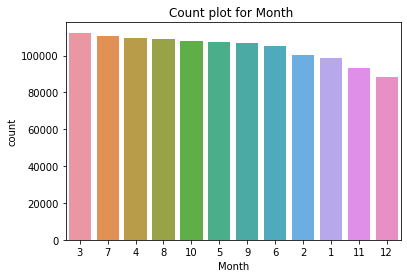

################################################
Frequency of each category of CreationDate_hr .
15    0.058478
14    0.058243
13    0.055437
16    0.053947
10    0.052704
12    0.051807
9     0.051779
11    0.051238
17    0.049930
18    0.048509
19    0.047211
20    0.045118
8     0.043365
21    0.041229
7     0.040717
6     0.036496
22    0.034911
5     0.029840
23    0.029188
4     0.025234
0     0.024893
3     0.023530
1     0.023190
2     0.023008
Name: CreationDate_hr, dtype: float64
Count plot for CreationDate_hr .


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


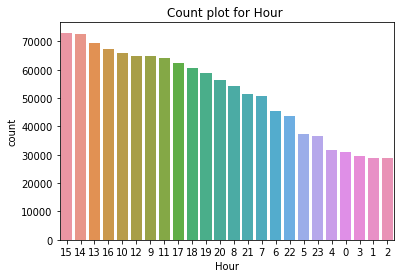

################################################
Frequency of each category of CreationDate_day .
Wednesday    0.175313
Thursday     0.172493
Tuesday      0.171524
Monday       0.157256
Friday       0.154373
Sunday       0.084596
Saturday     0.084445
Name: CreationDate_day, dtype: float64
Count plot for CreationDate_day .


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


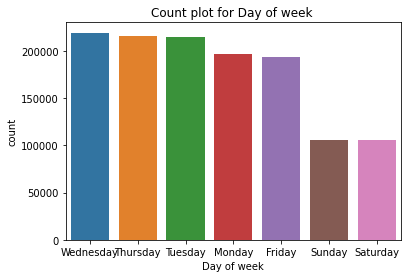

################################################
Frequency of each category of CreationDate_year .
2015    0.182708
2014    0.172510
2016    0.168158
2013    0.163803
2012    0.131859
2011    0.095981
2010    0.055867
2009    0.024875
2008    0.004240
Name: CreationDate_year, dtype: float64
Count plot for CreationDate_year .


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


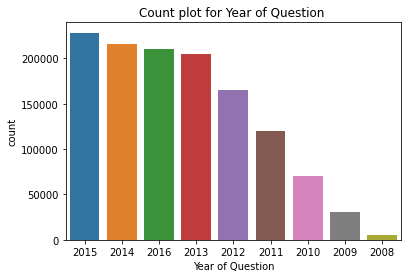

In [ ]:
dateTime_vars = {'CreationDate_date' : "Date of Month",
                 'CreationDate_month': 'Month',
                 'CreationDate_hr': 'Hour',
                 'CreationDate_day': 'Day of week',
                 'CreationDate_year' : 'Year of Question'}

for col, name in dateTime_vars.items():
  univariateCategorical(questions_df, col, name, limit = 30)


#### **Analysis**

**Date of Month**

There is a more-or-less a constant stream of questions through out the month except for the 1st and the last days of the month.

**Month**

Most questions come in the month of March?  and there is steep drop during November and December, potantially because of holiday season.

**Hour of the Day**

Most questions come before the noon(UTC), and then there is a steep drop with the leat number of questions coming in at 2 am (UTC).

**Day of the Week**

The number of questions remain constant through out the week with a sharp drop on Saturday and Sunday (pretty intuitive).

**Year of the Question**

Most Questinos were asked in the year 2015 closely followed by 2014 and 2016. The number of questions has been increasing constantly every year.



## Answer

### Numerical Variables

In [ ]:
answers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2001316 entries, 0 to 2014515
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  int64  
 1   OwnerUserId         int64  
 2   ParentId            int64  
 3   Score               int64  
 4   Score_std           float64
 5   CreationDate_date   int64  
 6   CreationDate_month  int64  
 7   CreationDate_hr     int64  
 8   CreationDate_day    object 
 9   CreationDate_year   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 168.0+ MB


---------------------------------------
UNIVARIATE ANALYSIS for Score
Description of Score
count    2.001316e+06
mean     2.479975e+00
std      1.592961e+01
min     -4.200000e+01
25%      0.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      5.718000e+03
Name: Score, dtype: float64


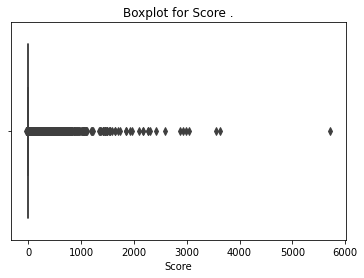

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


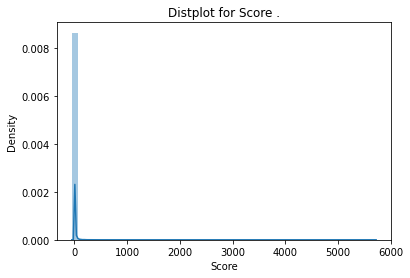

In [ ]:
numerical_cols = {'Score': 'Answer Score'}
for col, name in numerical_cols.items():
  univariateNumerical(answers_df, col, name)

#### **Analysis**

**Answer Score**

Similar to question score, most questions get a score from 0-2. Very few questions have a score beyond 3. That's why the distribution is skewed so much to the right.

### DateTime Variables

In [ ]:
answers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2001316 entries, 0 to 2014515
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  int64  
 1   OwnerUserId         int64  
 2   ParentId            int64  
 3   Score               int64  
 4   Score_std           float64
 5   CreationDate_date   int64  
 6   CreationDate_month  int64  
 7   CreationDate_hr     int64  
 8   CreationDate_day    object 
 9   CreationDate_year   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 168.0+ MB


################################################
Frequency of each category of CreationDate_date .
18    0.034069
19    0.033996
11    0.033836
17    0.033725
22    0.033698
10    0.033491
12    0.033464
16    0.033346
9     0.033319
13    0.033239
4     0.033166
8     0.033129
5     0.033028
7     0.032968
20    0.032921
14    0.032903
23    0.032868
3     0.032845
21    0.032836
15    0.032795
6     0.032664
24    0.032571
27    0.032482
28    0.032294
26    0.032156
2     0.031892
25    0.031770
29    0.030998
1     0.030270
30    0.029684
31    0.017579
Name: CreationDate_date, dtype: float64
Count plot for CreationDate_date .


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


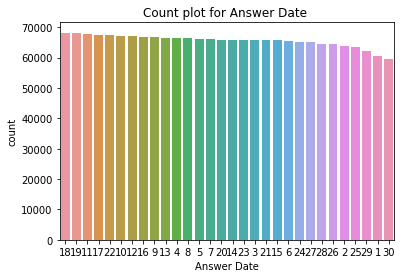

################################################
Frequency of each category of CreationDate_month .
3     0.089658
7     0.087550
8     0.087085
4     0.086568
5     0.085268
9     0.085098
10    0.084843
6     0.082498
1     0.081479
2     0.080976
11    0.075770
12    0.073208
Name: CreationDate_month, dtype: float64
Count plot for CreationDate_month .


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


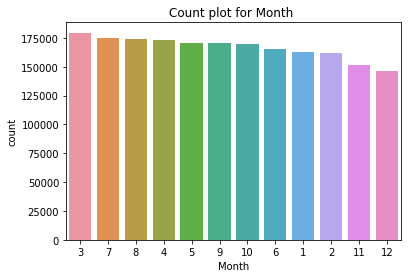

################################################
Frequency of each category of CreationDate_hr .
14    0.058068
15    0.057842
13    0.056167
16    0.053667
12    0.052384
17    0.050373
10    0.049904
9     0.049764
11    0.049562
18    0.048995
19    0.048256
20    0.047183
8     0.043548
21    0.043443
7     0.040526
22    0.036129
6     0.035529
23    0.029842
5     0.029435
4     0.025271
0     0.025242
1     0.023140
3     0.022934
2     0.022796
Name: CreationDate_hr, dtype: float64
Count plot for CreationDate_hr .


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


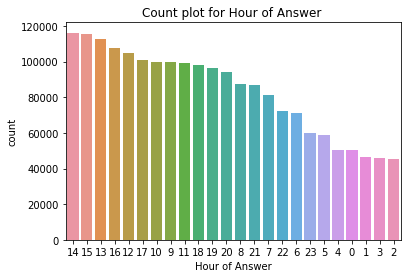

################################################
Frequency of each category of CreationDate_day .
Wednesday    0.175642
Thursday     0.173351
Tuesday      0.172370
Friday       0.158049
Monday       0.153871
Saturday     0.084187
Sunday       0.082530
Name: CreationDate_day, dtype: float64
Count plot for CreationDate_day .


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


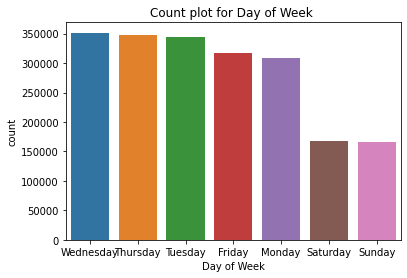

################################################
Frequency of each category of CreationDate_year .
2013    0.165885
2014    0.160921
2015    0.159086
2012    0.141956
2016    0.127959
2011    0.113737
2010    0.073587
2009    0.046413
2008    0.010457
Name: CreationDate_year, dtype: float64
Count plot for CreationDate_year .


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


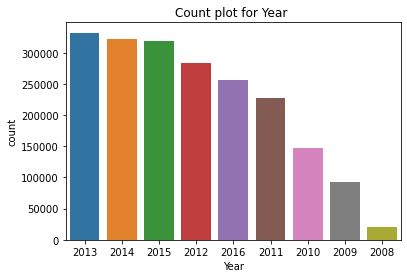

In [ ]:
dateTime_vars = {'CreationDate_date': 'Answer Date',
                 'CreationDate_month': 'Month',
                 'CreationDate_hr': 'Hour of Answer',
                 'CreationDate_day': 'Day of Week',
                 'CreationDate_year': 'Year'}

for col, name in dateTime_vars.items():
  univariateCategorical(answers_df, col, name, limit = 30)


#### **Analysis**

**Answer Date**

Number of Answers seem to be constant throughout the month. with the first and last day of the month have the least answers.

**Month of Answer**

Similar to questions answers are provided more or less at the same amout through the year with a slight dip during November and December. 

**Hour of Answer**

This also follows a patterns similar to questions. Most answers come between 12pm and 6pm UTC. followed by a sharp drop.

**Day of the week**

The weekends Observe a sharp reduction in the number of answers.

**Year**

Most Answers were provided in 2013, 14 and 15.


## Tags

In [ ]:
tags_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3750993 entries, 0 to 3750993
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Tag     object
dtypes: int64(1), object(1)
memory usage: 85.9+ MB


### Categorical Variables

################################################
Frequency of each category of Tag .
javascript                  3.309924e-02
java                        3.071507e-02
c#                          2.697579e-02
php                         2.634182e-02
android                     2.416933e-02
                                ...     
assemblyversionattribute    2.665961e-07
weblogic-integration        2.665961e-07
argument-unpacking          2.665961e-07
alias-method-chain          2.665961e-07
plistbuddy                  2.665961e-07
Name: Tag, Length: 37035, dtype: float64
Count plot for Tag .


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


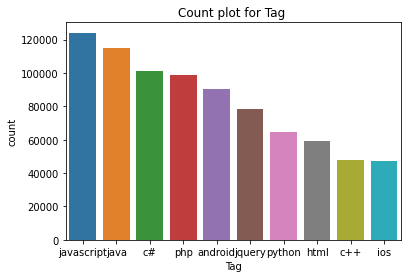

In [ ]:
cat_columns = {'Tag':'Tag'}

for col, name in cat_columns.items():
  univariateCategorical(tags_df, col, name, limit = 10)


#### **Analysis**

**Tags**
The top 10 tags on StackOverflow in order are 


1. javascript
2. Java
3. c#
4. php
5. android
6. jquery
7. python
8. html
9. c++
10. ios

A majority of these languages are used for web development and app development. With a few for core Software development sich as c##, Java, python which is used for data science.




## Users

In [ ]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465460 entries, 0 to 1990479
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   id                465460 non-null  int64              
 1   display_name      465460 non-null  object             
 2   last_access_date  465460 non-null  datetime64[ns, UTC]
 3   reputation        465460 non-null  int64              
 4   views             465460 non-null  int64              
 5   reputation_std    465460 non-null  float64            
 6   views_std         465460 non-null  float64            
 7   active_last_year  465460 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(2), int64(4), object(1)
memory usage: 32.0+ MB


### Numerical Variable

---------------------------------------
UNIVARIATE ANALYSIS for reputation
Description of reputation
count    4.654600e+05
mean     1.977049e+03
std      1.098895e+04
min      1.000000e+00
25%      6.600000e+01
50%      3.530000e+02
75%      1.165000e+03
max      1.128126e+06
Name: reputation, dtype: float64


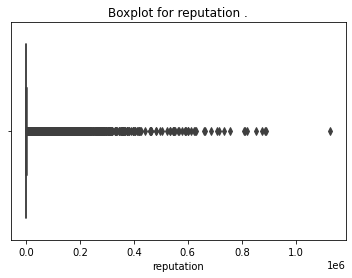

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


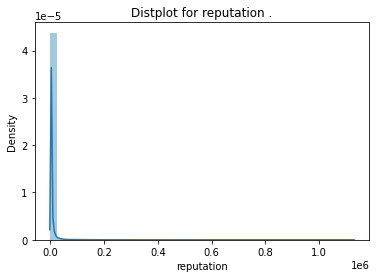

---------------------------------------
UNIVARIATE ANALYSIS for views
Description of views
count    4.654600e+05
mean     2.400751e+02
std      3.396432e+03
min      0.000000e+00
25%      1.200000e+01
50%      4.500000e+01
75%      1.440000e+02
max      1.835157e+06
Name: views, dtype: float64


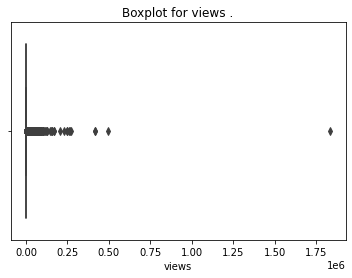

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


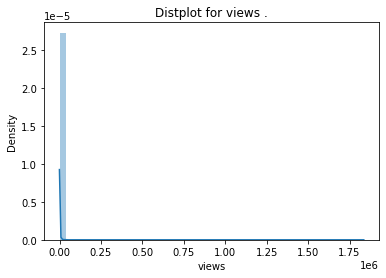

In [ ]:
numerical_cols = {'reputation': 'Reputation',
                  'views': 'Views'}

for col, name in numerical_cols.items():
  univariateNumerical(users_df, col, name)

#### **Analysis**

**Reputation**

A lot of the users have a relatively low reputation of ~350. only a few users get a high reputation, thereby skewing the distribution to the right.

**Views**

Except for a few users 75% of the people have a view count of less than 200. So this is not going to be very analytically useful for us.

## Categorical Variables

In [ ]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465460 entries, 0 to 1990479
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   id                465460 non-null  int64              
 1   display_name      465460 non-null  object             
 2   last_access_date  465460 non-null  datetime64[ns, UTC]
 3   reputation        465460 non-null  int64              
 4   views             465460 non-null  int64              
 5   reputation_std    465460 non-null  float64            
 6   views_std         465460 non-null  float64            
 7   active_last_year  465460 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(2), int64(4), object(1)
memory usage: 32.0+ MB


################################################
Frequency of each category of active_last_year .
1    0.610628
0    0.389372
Name: active_last_year, dtype: float64
Count plot for active_last_year .


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


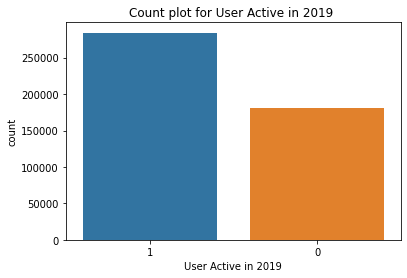

In [ ]:
cat_columns = {'active_last_year': 'User Active in 2019'}

for col, name in cat_columns.items():
  univariateCategorical(users_df, col, name)

#### **Analysis**

**Active Last year**

60% of the users were active last year, which means we can send them notifications when a relevant questions is posted.

# Segmented Univariate Analysis


## User Recommendation for the fastest answers

We perform Segmented Univariate analysis on the users who answered Data Science tagged questions and were active in the year 2019.

First lets find questions with DS tag

In [ ]:
questions_df.head(1)

,Id,OwnerUserId,Score,closed,Score_std,TimeToAnswer,TimeToAnswer_std,ds_tags,python,r,matlab,sas,excel,sql,title_length,body_length,title_length_std,body_length_std,hasCode,numTags,tags_present,CreationDate_date,CreationDate_month,CreationDate_hr,CreationDate_day,CreationDate_year,num_of_answers,num_of_answers_std
0,80,26,26,0,1.774833,2.211111,-0.312692,0,0,0,0,0,0,0,58,1941,0.314937,0.282278,1,3,1,1,8,13,Friday,2008,3,0.964571


In [ ]:
ds_tag_questions = questions_df[questions_df['ds_tags'] == 1]

In [ ]:
ds_tag_questions.shape

(130710, 28)

There are 130K data science related questions. Lets now find answers to these questions 

In [ ]:
answers_df.head(1)

,Id,OwnerUserId,ParentId,Score,Score_std,CreationDate_date,CreationDate_month,CreationDate_hr,CreationDate_day,CreationDate_year
0,92,61,90,13,0.660407,1,8,14,Friday,2008


In [ ]:
ds_question_ids = ds_tag_questions['Id'].values
ds_answers = answers_df[answers_df['ParentId'].isin(ds_question_ids)]

In [ ]:
ds_answers.shape

(212133, 10)

There are 212K answers to the 130K DS tagged questions. Now lets find out who answered these.

In [ ]:
ds_answer_owners = ds_answers['OwnerUserId'].values
ds_answer_owners = np.unique(ds_answer_owners)

In [ ]:
# Users who answered DS questions
ds_answer_users = users_df[users_df['id'].isin(ds_answer_owners)]
print(ds_answer_users.shape) 

(70982, 8)


71K people answered Data Science related questions. Lets us find out how many people answered them in the year of 2019.?

In [ ]:
active_ds_users = ds_answer_users[ds_answer_users['active_last_year'] == 1]

In [ ]:
active_ds_users.shape  

(50262, 8)

50K users answered questions on Data Science l=in theyear of 2019

Lets now sort these users on reputation and last access date.

In [ ]:
active_ds_users.head(1)

,id,display_name,last_access_date,reputation,views,reputation_std,views_std,active_last_year
105,12734,Kelly Adams,2019-08-29 19:59:10.743000+00:00,695,105,-0.116667,-0.03977,1


In [ ]:
active_ds_users = active_ds_users.sort_values(by = ['reputation', 'last_access_date'], 
                                              ascending = False)

We can take the top 20 of these users with the highest reputation. We can recommend these users to answers to the latest questions on Data Science.

In [ ]:
top_20_ds_users = active_ds_users['display_name'][:20].values

In [ ]:
print(top_20_ds_users)

['Jon Skeet' 'VonC' 'BalusC' 'Darin Dimitrov' 'Gordon Linoff'
 'Marc Gravell' 'Hans Passant' 'CommonsWare' 'Martijn Pieters'
 'T.J. Crowder' 'SLaks' 'Greg Hewgill' 'Quentin' 'paxdiablo'
 'Alex Martelli' 'dasblinkenlight' 'CMS' 'Mark Byers'
 'Ignacio Vazquez-Abrams' 'marc_s']


We can notify these 20 users which the highest reputation and who were active recently.

1. Jon Skeet 
2. VonC
3. BalusC 
4. Darin Dimitrov
5. Gordon Linoff
6. Marc Gravell
7. Hans Passant
8. CommonsWare
9. Martijn Pieters
10. T.J. Crowder
11. SLaks
12. Greg Hewgill
13. Quentin
14. paxdiablo
15. Alex Martelli
16. dasblinkenlight
17. CMS
18. Mark Byers
19. Ignacio Vazquez-Abrams
20. marc_s

## Time to Answer for Data Science Tags
Now let us come up with a solution to question 2
> When a user provides a data science tag ('python', 'r', 'matlab', 'sas', 'excel', 'sql') to their question, then Stack Overflow should come up with the expected approximate time to get it answered.

For this we will need to analyse the time to get an answer based on Ds tag.

Next, question 3.
> When a user provides a data science tag ('python', 'r', 'matlab', 'sas', 'excel', 'sql') to their question, then Stack Overflow should come up with the expected approximate time to get it answered.

1. Time to answer a question, with a `<code>` present in the body.
2. Time to answer a question, based on the day of week the question was posted.
3. Time to answer a question, based on the hour of the question was posted.

In [152]:
# select the questions with ds tag
ds_tag_questions.head()

,Id,OwnerUserId,Score,closed,Score_std,TimeToAnswer,TimeToAnswer_std,ds_tags,python,r,matlab,sas,excel,sql,title_length,body_length,title_length_std,body_length_std,hasCode,numTags,tags_present,CreationDate_date,CreationDate_month,CreationDate_hr,CreationDate_day,CreationDate_year,num_of_answers,num_of_answers_std
2,120,83,21,0,1.408583,1278.850833,-0.128455,1,0,0,0,0,0,1,17,431,-1.755007,-0.524613,1,3,1,1,8,15,Friday,2008,1,-0.391091
22,1970,116,10,0,0.602833,0.066389,-0.313001,1,0,0,0,0,0,1,71,134,0.971260,-0.683319,0,5,1,5,8,6,Tuesday,2008,7,3.675896
23,2120,383,77,0,5.510582,2.625000,-0.312632,1,0,0,0,0,0,1,28,563,-1.199657,-0.454077,1,2,1,5,8,11,Tuesday,2008,7,3.675896
33,2840,383,32,0,2.214333,0.039167,-0.313005,1,0,0,0,0,0,1,30,409,-1.098684,-0.536369,0,3,1,5,8,20,Tuesday,2008,6,2.998065
46,4110,369,7,1,0.383083,0.158611,-0.312988,1,0,0,0,0,0,1,72,369,1.021747,-0.557743,0,4,1,6,8,23,Wednesday,2008,5,2.320233


In [162]:
ds_tags = ['python', 'r', 'matlab', 'sas', 'excel', 'sql']
for tag in ds_tags:
  print("Tag {}".format(tag))
  print(ds_tag_questions[ds_tag_questions[tag] == 1]['TimeToAnswer'].describe())
  print("---------------------------------")

Tag python
count    63945.000000
mean      1641.110896
std       5656.582919
min        -22.977222
25%          0.116111
50%          0.460556
75%         10.506667
max      71172.881667
Name: TimeToAnswer, dtype: float64
---------------------------------
Tag r
count    15609.000000
mean      1955.430881
std       5678.362249
min        -18.450556
25%          0.218889
50%          0.801667
75%         21.152778
max      63476.325833
Name: TimeToAnswer, dtype: float64
---------------------------------
Tag matlab
count     6441.000000
mean      2245.372775
std       6556.443368
min        -15.382222
25%          0.241944
50%          1.022500
75%         17.511111
max      59912.915278
Name: TimeToAnswer, dtype: float64
---------------------------------
Tag sas
count      690.000000
mean      1055.950224
std       4388.653625
min        -21.596389
25%          0.443403
50%          1.501667
75%          6.509097
max      38671.078611
Name: TimeToAnswer, dtype: float64
------------------

Since we know that the results are highly right skewed we can take the 50 percentile to have a safe estimation of th time to answer and a 75 percentile to give a conservative estimation.

|Tags | Time to Answer Average estimation | realistic estimation|
| --  | -- | -- |
| SQL |10 mins|55 mins|
| R   |48 mins|21 hr|
| Python|25 mins|11 hr|
|SAS  |1.5 hr| 6.5 hr|
|excel|55 mins|18.5 hr|
|SQL|12 mins|55.2|


## Time to answer whether `<code>` present

Lets use Boxplot to see how `TimeToAnswer` depends on whether `<code>` is present.

In [163]:
questions_df.head(1)

,Id,OwnerUserId,Score,closed,Score_std,TimeToAnswer,TimeToAnswer_std,ds_tags,python,r,matlab,sas,excel,sql,title_length,body_length,title_length_std,body_length_std,hasCode,numTags,tags_present,CreationDate_date,CreationDate_month,CreationDate_hr,CreationDate_day,CreationDate_year,num_of_answers,num_of_answers_std
0,80,26,26,0,1.774833,2.211111,-0.312692,0,0,0,0,0,0,0,58,1941,0.314937,0.282278,1,3,1,1,8,13,Friday,2008,3,0.964571


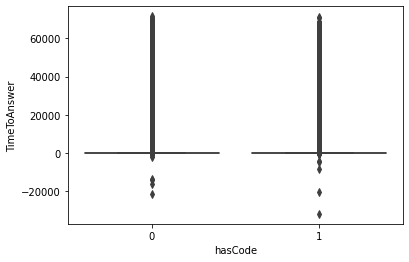

In [165]:
sns.boxplot(x = 'hasCode', y = 'TimeToAnswer', data = questions_df)
plt.show()

As we can see this plot is not able to show any information due to the skewed nature of the distribution. Lets instead view it as a table

In [167]:
questions_df.groupby('hasCode')['TimeToAnswer'].describe()

,count,mean,std,min,25%,50%,75%,max
hasCode,,,,,,,,
0,325267.0,2571.366626,7823.128720,-21368.250000,0.163333,1.200278,77.380833,71583.231111
1,924495.0,2027.386468,6580.284031,-31896.541944,0.129722,0.565278,18.080972,71172.881667


The 50th-percentile and 75th-percentile show a more realistic picture and there is a significant difference in the `TimeToAnswer` between them. As expected, you are likely to get a faster answer if you have included `<code>` in your question.

## `TimeToAnswer` depending on day of week the question was posted.

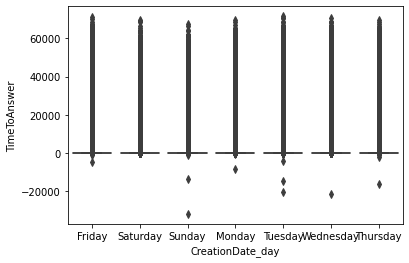

In [169]:
sns.boxplot(x = 'CreationDate_day', y = 'TimeToAnswer', data = questions_df)
plt.show()

As expected, this too isnt able to shed any light due to the skewed nature of the data. Lets use the table to see a pattern

In [172]:
questions_df.groupby('CreationDate_day')['TimeToAnswer'].describe().sort_values(ascending = False,
                                                                                by = ['75%', '50%'])

,count,mean,std,min,25%,50%,75%,max
CreationDate_day,,,,,,,,
Friday,192930.0,2188.146879,6971.261965,-4924.563611,0.133889,0.650694,39.897083,71172.881667
Saturday,105536.0,2051.404084,6751.830192,-15.354167,0.148611,0.728333,25.039861,69628.381389
Monday,196532.0,2222.194347,7004.250012,-8127.855556,0.135000,0.670556,24.193542,69577.263889
Thursday,215575.0,2195.504009,6977.887178,-16299.907778,0.135278,0.656944,23.881806,69674.103889
Wednesday,219100.0,2181.932749,6949.970667,-21368.250000,0.134167,0.654444,23.135347,70541.854167
Tuesday,214364.0,2192.240691,6970.005257,-20256.587778,0.134444,0.646111,22.540208,71583.231111
Sunday,105725.0,2024.177610,6654.570211,-31896.541944,0.146389,0.699722,19.158889,67429.744167


**Friday** and **Saturday** take the longest to get an answer.

|Day | Time to Answer estimation | realistic estimation|
| --  | -- | -- |
| Monday |40 mins|24 hr| 	
| Tuesday|40 mins|22 hr|
| Wednesday|40 mins |23 hr|
|Thursday|40 mins| 24 hr|
|Friday|40 mins|39 hr|
|Saturday|45 mins|25 hr|
|Sunday| 45 mins| 19 hr |


## `TimeToAnswer` to dependng on Hour of Day

In [173]:
questions_df.head(1)

,Id,OwnerUserId,Score,closed,Score_std,TimeToAnswer,TimeToAnswer_std,ds_tags,python,r,matlab,sas,excel,sql,title_length,body_length,title_length_std,body_length_std,hasCode,numTags,tags_present,CreationDate_date,CreationDate_month,CreationDate_hr,CreationDate_day,CreationDate_year,num_of_answers,num_of_answers_std
0,80,26,26,0,1.774833,2.211111,-0.312692,0,0,0,0,0,0,0,58,1941,0.314937,0.282278,1,3,1,1,8,13,Friday,2008,3,0.964571


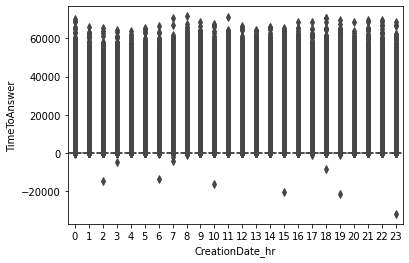

In [176]:
sns.boxplot(x = 'CreationDate_hr', y = 'TimeToAnswer', data = questions_df)
plt.show()

In [179]:
questions_df.head(1)

,Id,OwnerUserId,Score,closed,Score_std,TimeToAnswer,TimeToAnswer_std,ds_tags,python,r,matlab,sas,excel,sql,title_length,body_length,title_length_std,body_length_std,hasCode,numTags,tags_present,CreationDate_date,CreationDate_month,CreationDate_hr,CreationDate_day,CreationDate_year,num_of_answers,num_of_answers_std,log_TimeToAnswer
0,80,26,26,0,1.774833,2.211111,-0.312692,0,0,0,0,0,0,0,58,1941,0.314937,0.282278,1,3,1,1,8,13,Friday,2008,3,0.964571,0.793495


In [202]:
questions_df['log_TimeToAnswer'] = np.log(questions_df['TimeToAnswer'])

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [215]:
TimeToAnswer_order = questions_df.groupby('CreationDate_hr')['log_TimeToAnswer'].quantile(0.50).sort_values(ascending = True).index

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


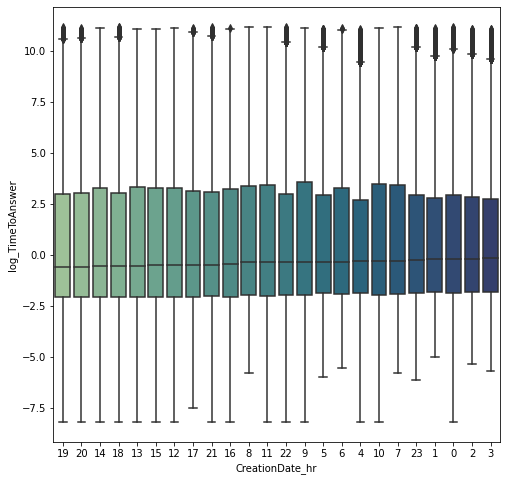

In [217]:
questions_df['log_TimeToAnswer'] = np.log(questions_df['TimeToAnswer'])
plt.subplots(figsize = (8, 8))
sns.boxplot(y = 'log_TimeToAnswer', x = 'CreationDate_hr', 
            data = questions_df, order = TimeToAnswer_order,
            palette = 'crest')
plt.show()

This plot reveals that it is recommended to ask questions between 12 pm and 9pm.

## `TimeToAnswer` for Tag presence

In [222]:
questions_df.groupby('tags_present')['TimeToAnswer'].describe()

,count,mean,std,min,25%,50%,75%,max
tags_present,,,,,,,,
0,2.0,31.375833,44.113249,0.183056,15.779444,31.375833,46.972222,62.568611
1,1249760.0,2168.967881,6929.369209,-31896.541944,0.136667,0.665833,23.934722,71583.231111


There were only 2 questions without any tags present. and one of them took 63 hours to get its first answer. So it is highly recommended that you use tags with your question.

# Bivariate Analysis & Multi-Variate Analysis

In the next step of analysis we will do the following
1. Title length vs number of Answers.
2. Title length vs Time of Anwers.
3. Body length vs number of Answers.
4. Body length vs Time of Anwers.

These can be clubbed into one multi variate analysis plot like **Heat Map**. Here we must use the standardized variables because we are seeing the interaction between varibled with different ranges.

The intention is not to focus too much on the numerical value but to provide a loose recommendation for a user. 

We will also look into the effect of **Hour of Day & Day of week** on the **Time of Answer**, this can be done using a **pivot table**.

## Heatmap

In [223]:
questions_df.head(1)

,Id,OwnerUserId,Score,closed,Score_std,TimeToAnswer,TimeToAnswer_std,ds_tags,python,r,matlab,sas,excel,sql,title_length,body_length,title_length_std,body_length_std,hasCode,numTags,tags_present,CreationDate_date,CreationDate_month,CreationDate_hr,CreationDate_day,CreationDate_year,num_of_answers,num_of_answers_std,log_TimeToAnswer
0,80,26,26,0,1.774833,2.211111,-0.312692,0,0,0,0,0,0,0,58,1941,0.314937,0.282278,1,3,1,1,8,13,Friday,2008,3,0.964571,0.793495


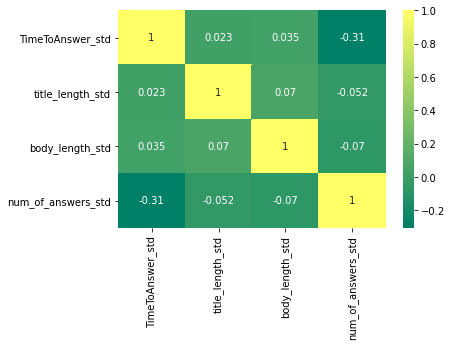

In [228]:
cols = ['TimeToAnswer_std', 'title_length_std',
        'body_length_std', 'num_of_answers_std']

sns.heatmap(questions_df[cols].corr(), annot = True, cmap = 'summer')

* There is a negative correlation between the **Number of Answers** a question already has and the **Time to Answer**. This matches reality, because once the first answer has been posted. Many people jump on that bandwagon.

* **Title Length** also seems to have a negative impact on the **Number of answers** . Questions with lengthy titles tend to create a larger barrier for answer.

* a longer **Body length** also acts to raise the bar for an answer and therefore we see a longer **Time to Answer** .

## Pivot Table

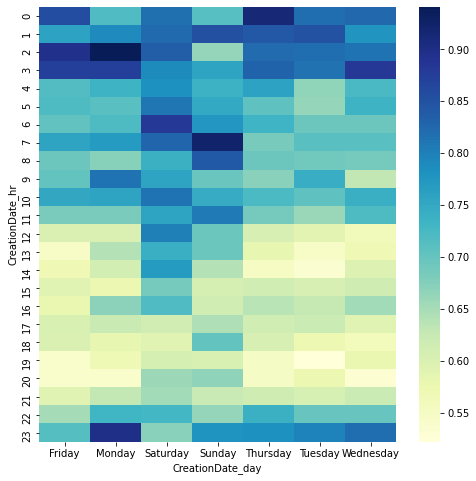

In [239]:
plt.subplots(figsize = (8, 8))
sns.heatmap(pd.pivot_table(data = questions_df, values = 'TimeToAnswer',
               index = 'CreationDate_hr', columns = 'CreationDate_day', 
               aggfunc = 'median'), cmap = 'YlGnBu')

In [242]:
pd.pivot_table(data = questions_df, values = 'TimeToAnswer', 
               index = 'CreationDate_hr', columns = 'CreationDate_day',
               aggfunc = 'median')[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 
                                    'Friday', 'Saturday', 'Sunday']]

CreationDate_day,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
CreationDate_hr,,,,,,,
0,0.719861,0.819583,0.825139,0.913611,0.856389,0.816944,0.712222
1,0.790278,0.850139,0.777500,0.843194,0.760278,0.823333,0.852778
2,0.940833,0.818611,0.813333,0.821667,0.895833,0.834444,0.664167
3,0.874722,0.814861,0.882778,0.830000,0.874722,0.789722,0.756111
4,0.735694,0.666389,0.724167,0.760278,0.717500,0.782778,0.737500
5,0.710833,0.663472,0.736111,0.706667,0.720278,0.810833,0.750278
6,0.721111,0.694722,0.694306,0.733889,0.704167,0.882222,0.774444
7,0.770417,0.710556,0.711389,0.684861,0.758611,0.827778,0.923889
8,0.673472,0.691944,0.688056,0.694722,0.694028,0.739583,0.842500


|Day|Recommended Time Slot | Time To Answer |
| --| -- | -- |
|Monday |2pm - 3pm, 6pm-7pm|35 min|
|Tuesday|12pm - 2pm, 6pm - 7pm|34 min|
|Wednesday|12pm - 1pm, 6pm - 7pm|35 min|
|Thursday|1pm - 2pm, 7pm - 8pm|33 min|
|Friday|1pm - 2pm, 7pm - 8pm|34 min|
|Saturday |5pm - 6pm|36min|
|Sunday|2pm - 3pm|40 min|


# EDA Summary

Lets summarize the most important results from this process.

## Problem 1
> When a user raises a question with a data science tag ('python', 'r', 'matlab', 'sas', 'excel', 'sql'), then Stack Overflow sends the notification to the relevant users.

We can notify these 20 users which the highest reputation and who were active recently.

1. Jon Skeet 
2. VonC
3. BalusC 
4. Darin Dimitrov
5. Gordon Linoff
6. Marc Gravell
7. Hans Passant
8. CommonsWare
9. Martijn Pieters
10. T.J. Crowder
11. SLaks
12. Greg Hewgill
13. Quentin
14. paxdiablo
15. Alex Martelli
16. dasblinkenlight
17. CMS
18. Mark Byers
19. Ignacio Vazquez-Abrams
20. marc_s



## Problem 2
>When a user provides a data science tag ('python', 'r', 'matlab', 'sas', 'excel', 'sql') to their question, then Stack Overflow should come up with the expected approximate time to get it answered.

|Tags | Time to Answer Average estimation | realistic estimation|
| --  | -- | -- |
| SQL |10 mins|55 mins|
| R   |48 mins|21 hr|
| Python|25 mins|11 hr|
|SAS  |1.5 hr| 6.5 hr|
|excel|55 mins|18.5 hr|
|SQL|12 mins|55.2|

## Problem 3
> While a user raises a question, Stack Overflow wants to provide some suggestions to the users to get their queries answered quickly.

1. Include 3-4 relevant tags. Adding irrelevsnt tags could result in the question being closed.
2. The question s recommended to be posted sometime in the between afternoon and late evening. 12pm - 3pm and 6pm - 8pm .
3. Dont make your Title and Body too long. Title length should be less than 80 characters at most. Try to keep the Body length arounf 1500 .
4. Keep this schedule for best results.

|Day|Recommended Time Slot | Time To Answer |
| --| -- | -- |
|Monday |2pm - 3pm, 6pm-7pm|35 min|
|Tuesday|12pm - 2pm, 6pm - 7pm|34 min|
|Wednesday|12pm - 1pm, 6pm - 7pm|35 min|
|Thursday|1pm - 2pm, 7pm - 8pm|33 min|
|Friday|1pm - 2pm, 7pm - 8pm|34 min|
|Saturday |5pm - 6pm|36min|
|Sunday|2pm - 3pm|40 min|



## Problem 4

> Let’s say Stack Overflow also wants to post some details on its job website to help various employees understand the subjects or topics trending in the industry.

The top 10 tags on StackOverflow in order are 


1. javascript
2. Java
3. c#
4. php
5. android
6. jquery
7. python
8. html
9. c++
10. ios

A majority of these languages are used for web development and app development. With a few for core Software development sich as c##, Java, python which is used for data science.

